<a href="https://colab.research.google.com/github/Ekliipce/ML-Based-Image-Compression/blob/main/ML_Based_Image_Compression_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers

In [178]:
class CNN_AE:
  def __init__(self, batch_shape, channels, rows, cols, latent_dim):
    self.encoder = None
    self.decoder = None
    self.autoencoder = None
    self.batch_shape  = batch_shape
    self.channels = channels
    self.rows = rows
    self.cols = cols
    self.latent_dim = latent_dim

  def build(self):
    input_shape = (self.rows, self.cols, self.channels)
    inputs = tf.keras.Input(input_shape)
    kernel_size = 9
    filter = 4

    self.encoder = tf.keras.Sequential([
        layers.Reshape(input_shape, input_shape=input_shape),
        #layers.Conv2D(filters=128, kernel_size=(5, 5), padding='same',
                      #activation='selu'),
        layers.Conv2D(filters=64, kernel_size=(7, 7), padding='same',
                      activation='selu'),
        layers.Conv2D(filters=16, kernel_size=(9, 9), padding='same',
                      activation='selu'),
    ])

    self.decoder = tf.keras.Sequential([
        layers.Conv2DTranspose(filters=16, kernel_size=(9, 9), padding='same',
                               activation='selu'),
        layers.Conv2DTranspose(filters=64, kernel_size=(7, 7), padding='same',
                               activation='selu'),
        #layers.Conv2DTranspose(filters=128, kernel_size=(5, 5), padding='same',
                              #activation='selu'),

        layers.Conv2DTranspose(filters=1, kernel_size=3, padding='same',
                               activation='sigmoid'),
        layers.Reshape((self.rows, self.cols))
    ])

    self.autoencoder = tf.keras.Sequential([self.encoder, self.decoder])
    return self.autoencoder

  def train(self, images_train, images_test, epochs=10):
    self.autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                             loss=tf.keras.losses.MeanSquaredError())
    self.autoencoder.fit(images_train, images_train, epochs=epochs, shuffle=True,
                         #batch_size=self.batch_shape,
                         validation_data=(images_test, images_test))
    return self.autoencoder

  def test():
    return None

In [163]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [164]:
x_train.shape

(60000, 28, 28)

In [165]:
nb_images = x_train.shape[0]
rows = x_train.shape[1]
cols = x_train.shape[2]
channels = 1


x_train = x_train.reshape(nb_images, rows, cols, channels)
x_test = x_test.reshape(x_test.shape[0], rows, cols, channels)

x_train.shape

(60000, 28, 28, 1)

In [166]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

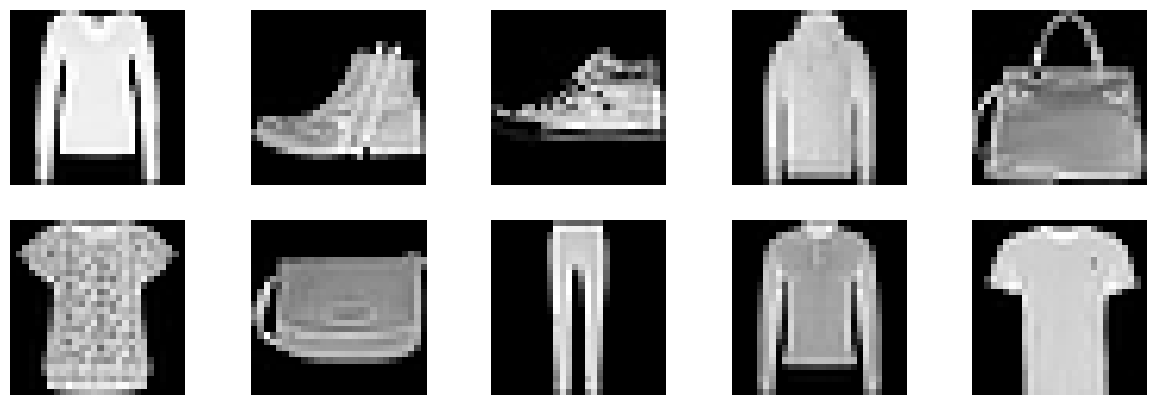

In [167]:
plt.figure(figsize=(15, 5))


for img, i in zip(tf.random.uniform((1, 10),
                  maxval=nb_images, dtype='int32',
                  seed=tf.random.set_seed(0))[0],
                  range(1, 11)):
  plt.subplot(2, 5, i)
  plt.imshow(x_train[img], cmap='gray')
  plt.axis('off')

plt.subplots_adjust(wspace=0.2)


In [179]:
latent_dim = 64
cnn_ae_2 = CNN_AE(32, channels, rows, cols, latent_dim)
cnn_ae_2.build()
cnn_ae_2.train(x_train, x_test, 2)

Epoch 1/2
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0018 - val_loss: 2.7609e-04
Epoch 2/2
1875/1875 [==============================] - 18s 10ms/step - loss: 2.3259e-04 - val_loss: 9.3770e-05


In [181]:
decoded_images = cnn_ae_2.autoencoder.predict(x_test)

313/313 [==============================] - 1s 3ms/step


Text(0.5, 1.0, 'compressed then decompressed')

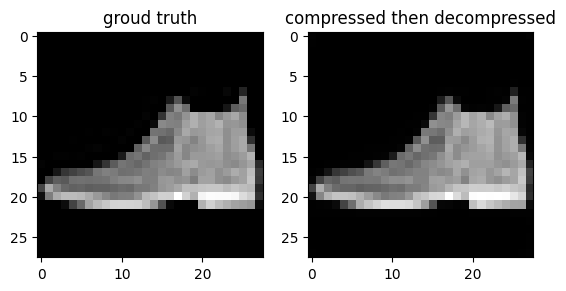

In [182]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(x_test[0], cmap='gray')
plt.title("groud truth")

plt.subplot(1, 2, 2)
plt.imshow(decoded_images[0], cmap='gray')
plt.title("compressed then decompressed")
